# Exploratory Analisys

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

energy_dataset = pd.read_csv('./../data/energy_data.csv')

### Distribuição das Variáveis Numéricas

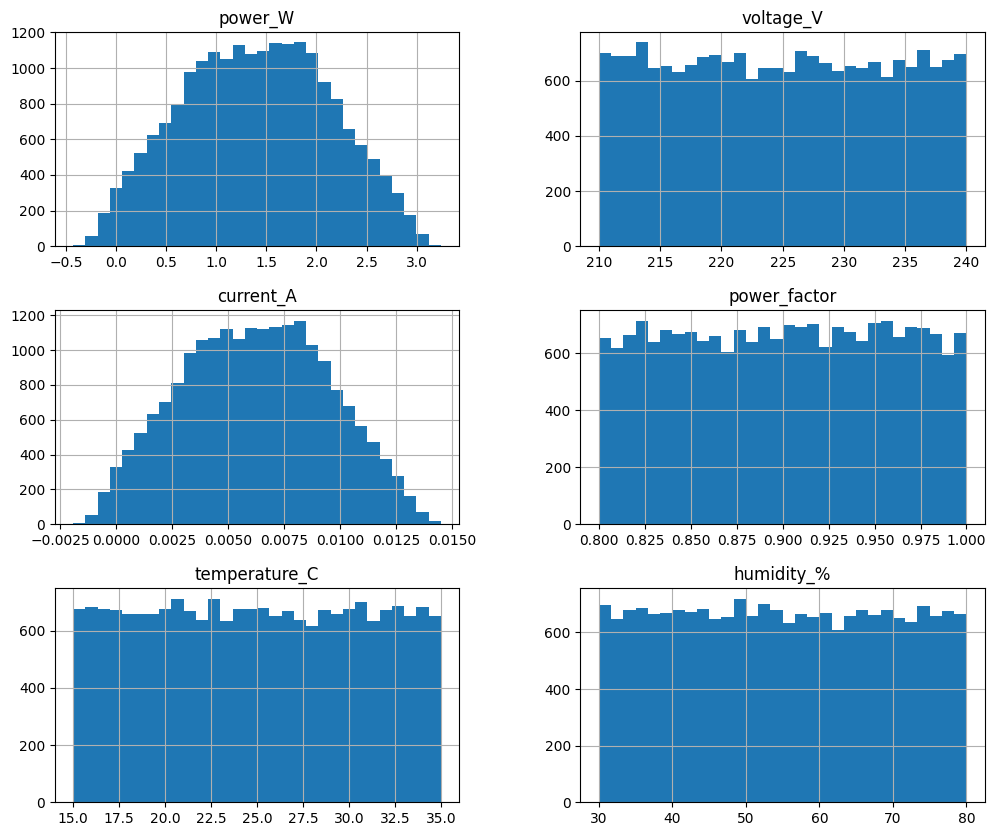

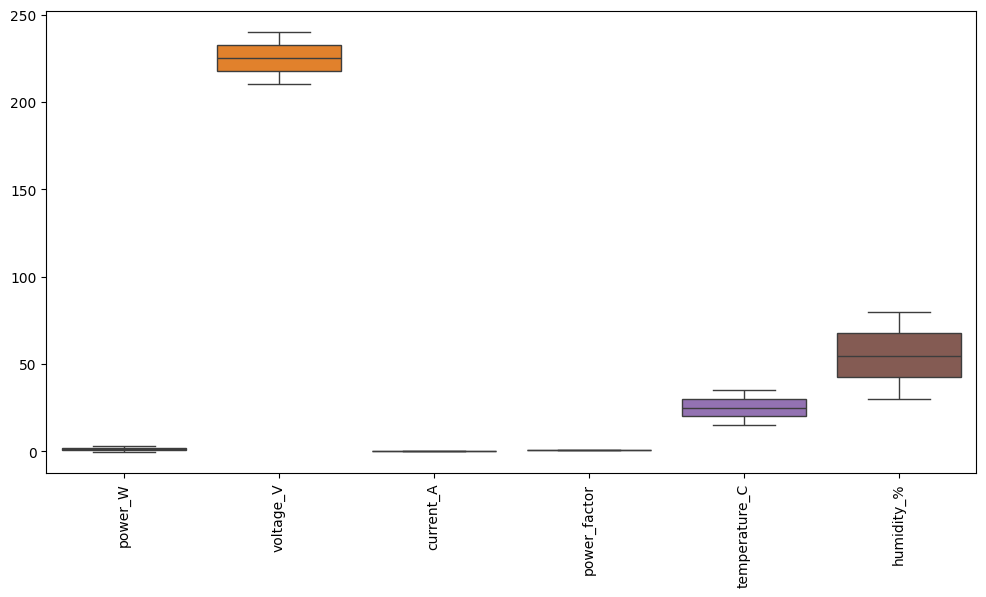

In [19]:
import seaborn as sns

energy_dataset.hist(bins=30, figsize=(12, 10))
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=energy_dataset)
plt.xticks(rotation=90)
plt.show()


### Coreelação entre Variáveis

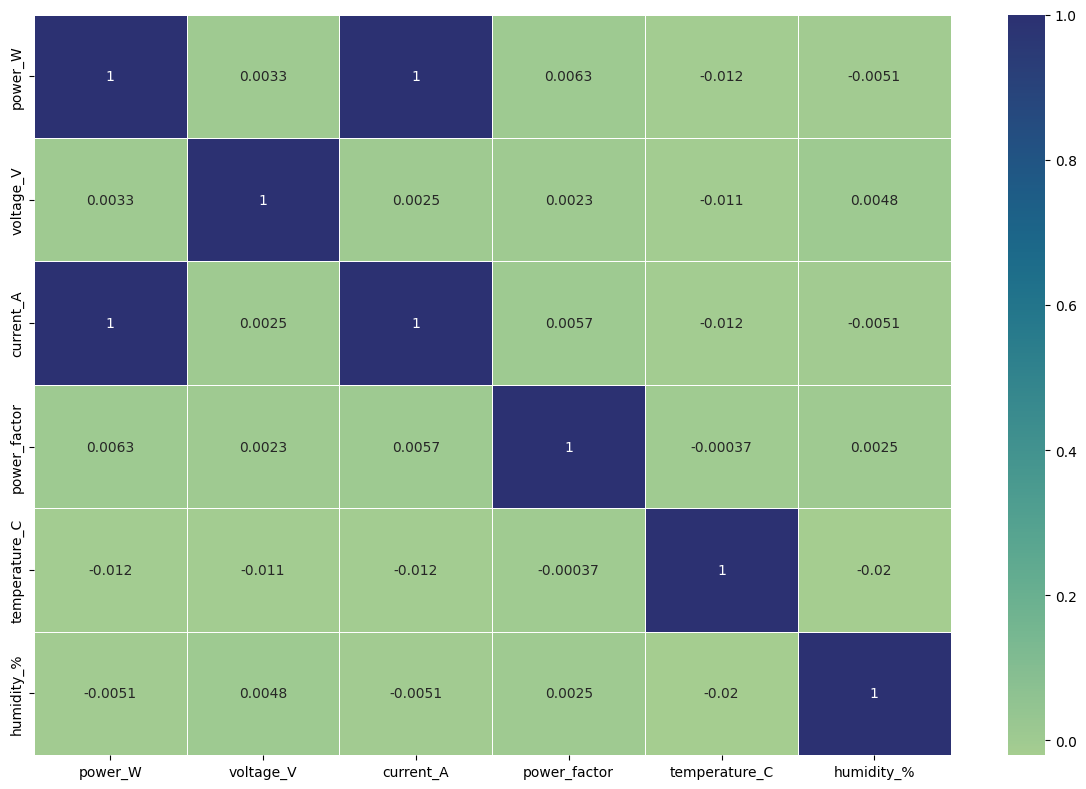

In [ ]:
numeric_cols = energy_dataset.select_dtypes(include=['int64', 'float64']).columns

correlation_matrix = energy_dataset[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="crest", linewidths=0.5)
plt.tight_layout()
plt.show()

### Análises Temporais

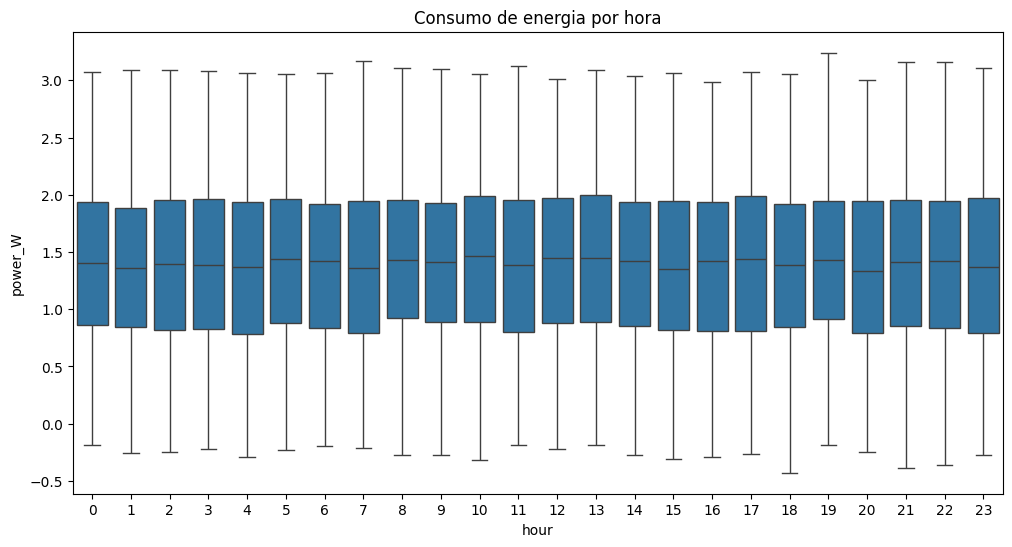

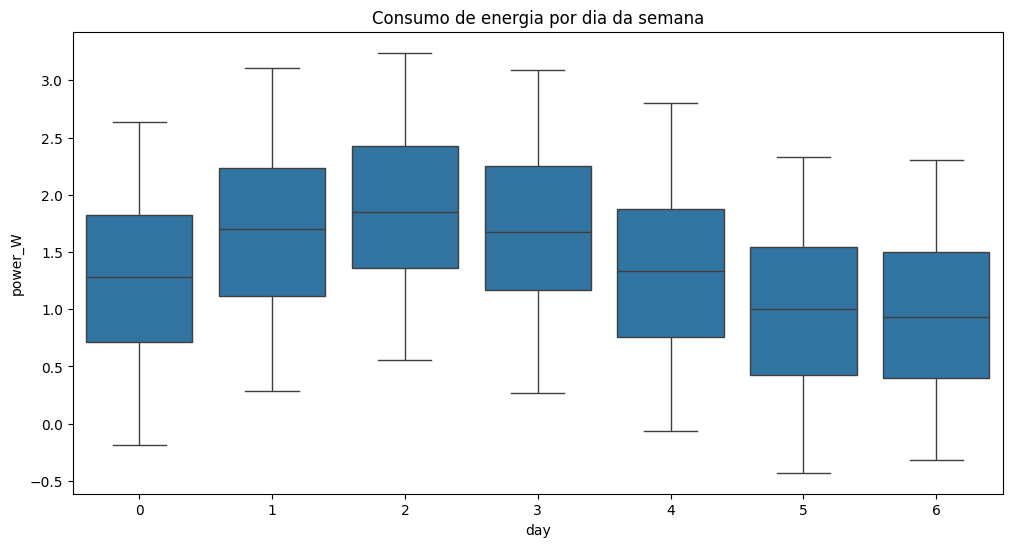

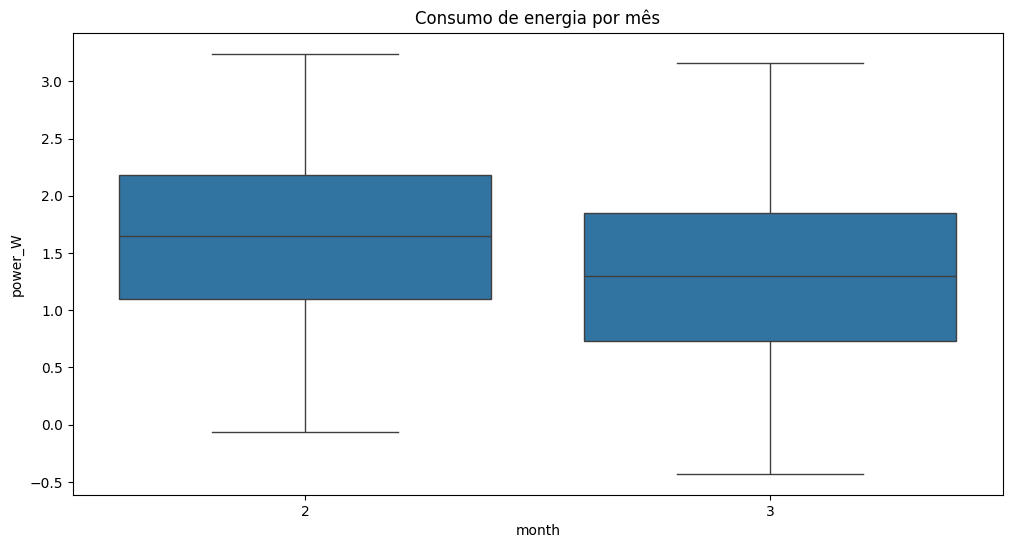

In [23]:
energy_dataset['timestamp'] = pd.to_datetime(energy_dataset['timestamp'])

energy_dataset['hour'] = energy_dataset['timestamp'].dt.hour
energy_dataset['day'] = energy_dataset['timestamp'].dt.dayofweek
energy_dataset['month'] = energy_dataset['timestamp'].dt.month

plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='power_W', data=energy_dataset)
plt.title('Consumo de energia por hora')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='day', y='power_W', data=energy_dataset)
plt.title('Consumo de energia por dia da semana')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='power_W', data=energy_dataset)
plt.title('Consumo de energia por mês')
plt.show()


### Identificação de Outliers

In [24]:
Q1 = energy_dataset.quantile(0.25)
Q3 = energy_dataset.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((energy_dataset < lower_bound) | (energy_dataset > upper_bound))
outliers = outliers.any(axis=1)
print(f'Número de outliers detectados: {outliers.sum()}')


Número de outliers detectados: 0


### Distribuição de Variáveis

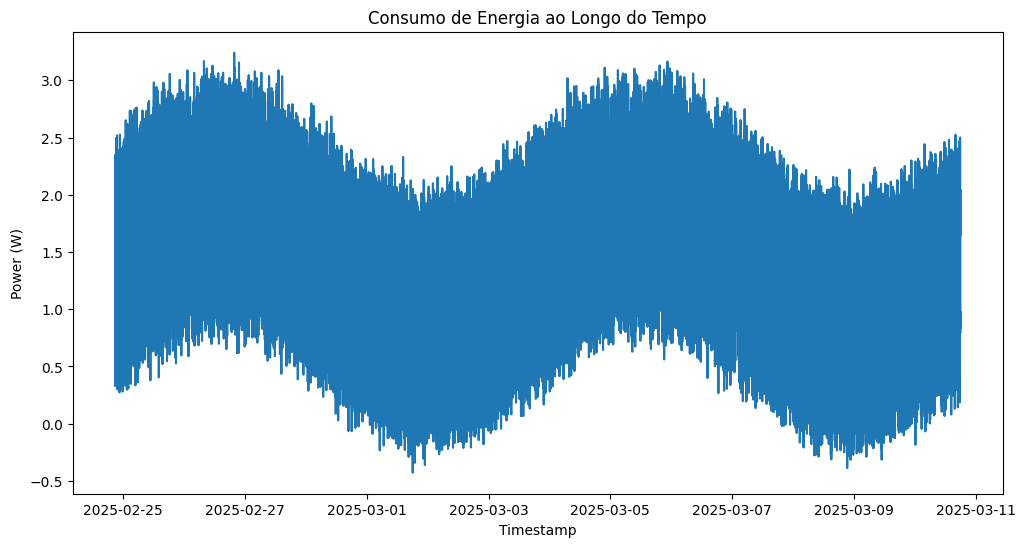

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(energy_dataset['timestamp'], energy_dataset['power_W'])
plt.title('Consumo de Energia ao Longo do Tempo')
plt.xlabel('Timestamp')
plt.ylabel('Power (W)')
plt.show()


### Clusterização e Segmentação

c:\Users\emanu\OneDrive\Documentos\GitHub\SmartEnergyForecast\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\emanu\OneDrive\Documentos\GitHub\SmartEnergyForecast\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Python312\Lib\subprocess.py", line 1538

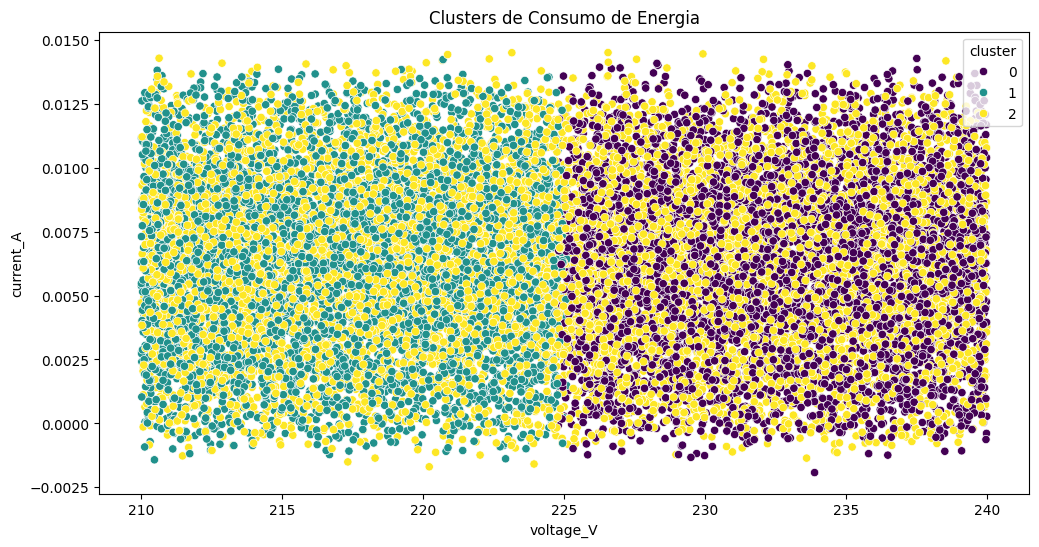

In [ ]:
from sklearn.cluster import KMeans

X = energy_dataset[['voltage_V', 'current_A', 'temperature_C', 'humidity_%']]

kmeans = KMeans(n_clusters=3)
energy_dataset['cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=energy_dataset, x='voltage_V', y='current_A', hue='cluster', palette='viridis')
plt.title('Clusters de Consumo de Energia')
plt.show()


Silhouette score para 2 clusters: 0.185
Silhouette score para 3 clusters: 0.173
Silhouette score para 4 clusters: 0.189
Silhouette score para 5 clusters: 0.190


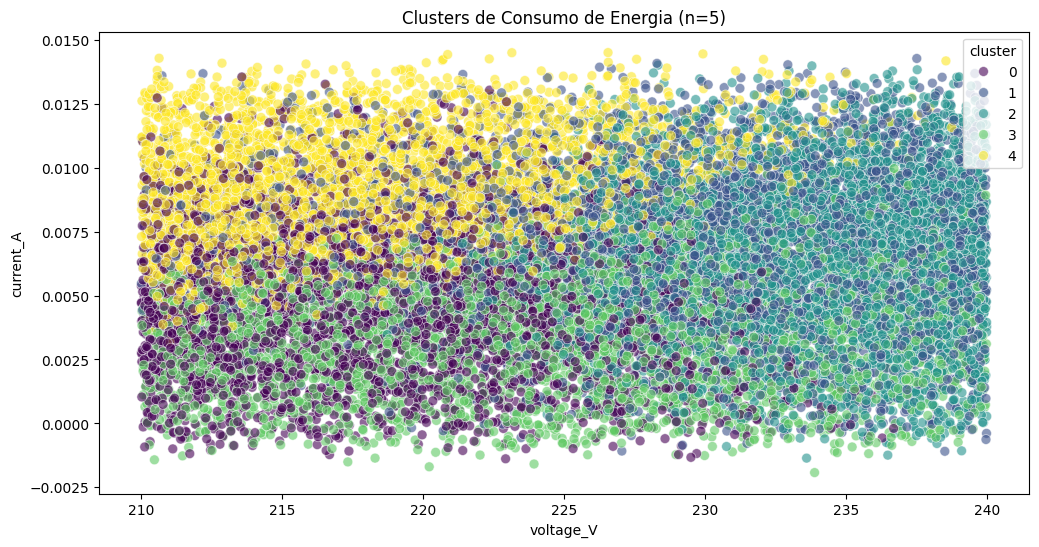

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np

X = energy_dataset[['voltage_V', 'current_A', 'temperature_C', 'humidity_%']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

silhouette_scores = []
for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette)
    print(f"Silhouette score para {n_clusters} clusters: {silhouette:.3f}")

n_clusters_best = np.argmax(silhouette_scores) + 2
kmeans = KMeans(n_clusters=n_clusters_best, random_state=42)
energy_dataset['cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=energy_dataset, 
                x='voltage_V', 
                y='current_A', 
                hue='cluster', 
                palette='viridis',
                alpha=0.6,
                s=50)
plt.title(f'Clusters de Consumo de Energia (n={n_clusters_best})')
plt.show()